In [97]:
%matplotlib notebook
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
import sys
import math
import warnings
warnings.filterwarnings('ignore')

In [98]:
# def normalization(data):
#     from sklearn.preprocessing import MinMaxScaler
#     scaler = MinMaxScaler()
#     data = scaler.fit_transform(data)
#     return data

In [99]:
df = pd.read_csv("new_dtrain.csv", delimiter=",")
zeros = df[df['latitude'] == 0]
df = df[df['latitude'] != 0]
subset = list(df.columns.values)
subset = subset.remove('price')
data = df.drop_duplicates(subset = subset)
#print(len(data[data.price > 1000000000]))
data = data[data.price < 1000000000]
data = data[data.price < 800000000]
data = shuffle(data)
data = data.reset_index(drop=True)

In [100]:
# data = log_feature(data)
#choosing data
X = data[['room_number', 'house_type',
       'built_time', 'appartments_floor', 'all_space', 'state', 'bathroom',
       'balcony', 'balcony_glassed', 'door', 'phone', 'ceiling', 'safety',
       'at_the_hotel', 'internet', 'furniture', 'parking', 'latitude',
       'longitude', 'building_floors', 'map_complex', 'floor',
          'trngl_first_point', 'trngl_second_point', 'trngl_third_point']]
# X_geo = data[['geocode_lat', 'geocode_long', 'trngl_first_point', 'trngl_second_point', 'trngl_third_point']]
y = data['price']
# x_columns = X.columns
# x_index = X.index
# X = normalization(X)
# X = pd.DataFrame(X, index=x_index, columns=x_columns)
# X = pd.concat([X, X_geo], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [101]:
model = KNeighborsRegressor(n_neighbors = 5, n_jobs=-1, p=1)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=5, p=1,
          weights='uniform')

In [102]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(model, X, y, cv=5)
# print(scores)

In [103]:
# var1 = 'longitude'
# var2 = 'latitude'

# data.plot.scatter(x=var1, y=var2, color = (0, 0, 0), s = 15, xlim = [76.70, 77.10], ylim = [43.10, 43.45])

In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Mean absolute error: ", mean_absolute_error(model.predict(X_test), y_test))
print("Mean squared error: ", mean_squared_error(model.predict(X_test), y_test))
print("R2 score: ", model.score(X_test, y_test))

Mean absolute error:  3814375.59364
Mean squared error:  2.26370082882e+14
R2 score:  0.785117614685


In [105]:
#firstly you should get an interval (confidence_interval function)
def price_range(price, interval):
    #confidence interval should be Global variable!!!
    upper_price = price + interval
    lower_price = price - interval
    return upper_price, price, lower_price

In [106]:
#confidence interval for whole DataFrame
def confidence_interval(data):
    const = 3.62
    price = data['price']
    std = np.std(price)
    Z = std/(math.sqrt(len(price)))
    return (Z * const)

In [107]:
#Substract 7% from answer of the model
def percent_(price):
    x = (7*price)/100
    price -= x
    return price

#def find_neighbors(data, point):
    

In [108]:
data.head()

,Index,address,room_number,price,map_complex,house_type,built_time,appartments_floor,all_space,state,...,internet,furniture,floor,parking,latitude,longitude,building_floors,trngl_first_point,trngl_second_point,trngl_third_point
0,35322,Абая 98 — Масанчи,3,35643000,1.0,3,2006,3.0,96.0,6,...,0,0.0,0,0,43.241169,76.921615,14.0,12.8161,-13.2567,1.3376
1,18264,Хусаинова 225 — Розыбакиева,3,55000000,96.0,3,2006,0.0,130.0,6,...,2,0.5,6,1,43.206299,76.891746,0.0,19.2900,-6.7828,7.8115
2,1104,Розыбакиева 283 — проспект Аль-Фараби,2,20000000,1.0,2,1988,8.0,59.2,5,...,2,1.0,6,1,43.197250,76.893075,9.0,20.0620,-6.0108,8.5835
3,13774,Навои 209 — Рыскулбекова,3,43000000,12.0,3,2009,2.0,94.0,6,...,2,0.5,6,1,43.206766,76.884964,16.0,19.9215,-6.1513,8.4430
4,525,Радостовца 15 — Толе би,3,19300000,1.0,2,1977,1.0,65.2,6,...,0,0.5,6,0,43.249719,76.889797,5.0,15.1429,-10.9299,3.6644


In [109]:
out = X_test[-1:]
y_test[-1:]

27515    20990000
Name: price, dtype: int64

In [110]:
out_pred = model.predict(out)
out_pred

array([ 23600000.])

In [111]:
error = abs(y_test[-1:] - out_pred)

In [112]:
error

27515    2610000.0
Name: price, dtype: float64

In [113]:
model.kneighbors(out)

(array([[  5.356748,   9.65429 ,  10.240948,  13.046265,  13.046265]]),
 array([[10973, 24135, 17097, 25621, 24646]]))

In [114]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [115]:
len(X.columns)

25

In [116]:
sfs = SFS(model, 
           k_features=25,
           forward=True,
           floating=False,
           scoring='neg_mean_squared_error',
           cv=0)

sfs = sfs.fit(X.values, y)

print('\nSequential Forward Selection (k=25):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)



Sequential Forward Selection (k=25):
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24)
CV Score:
-1.05764363204e+14


<IPython.core.display.Javascript object>


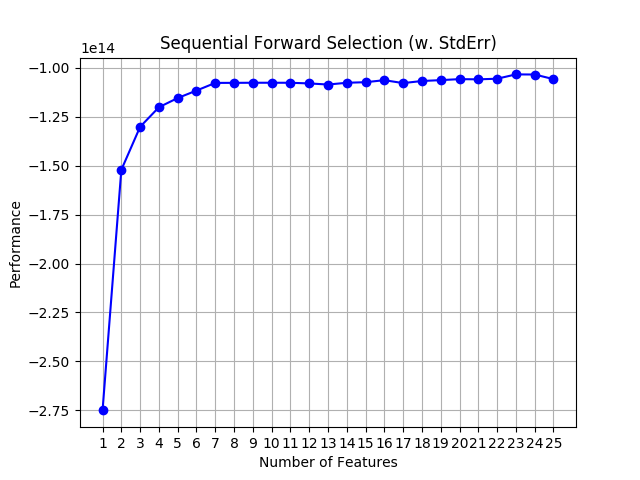

In [117]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()


Sequential Backward Selection (k=25):
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24)
CV Score:
0


<IPython.core.display.Javascript object>


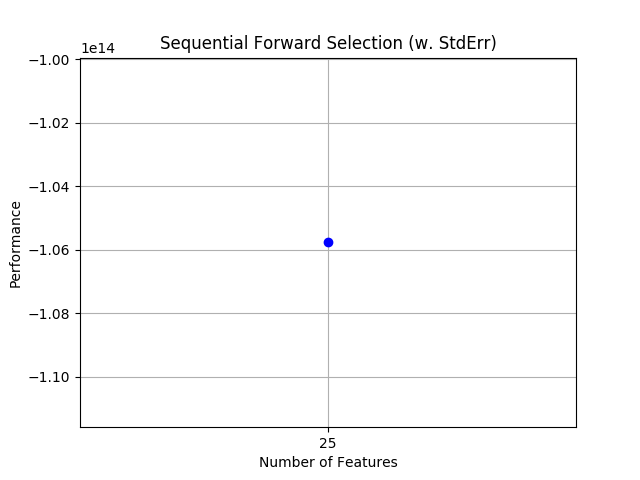

In [118]:
sbs = SFS(model, 
           k_features=25,
           forward=False,
           floating=False,
           scoring='neg_mean_squared_error',
           cv=0)

sbs = sbs.fit(X.values, y)

print('\nSequential Backward Selection (k=25):')
print(sbs.k_feature_idx_)
print('CV Score:')
print(sbs.k_score_)
fig = plot_sfs(sbs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()


Sequential Floating Forward Selection (k=25):
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24)
CV Score:
-1.05764363204e+14


<IPython.core.display.Javascript object>


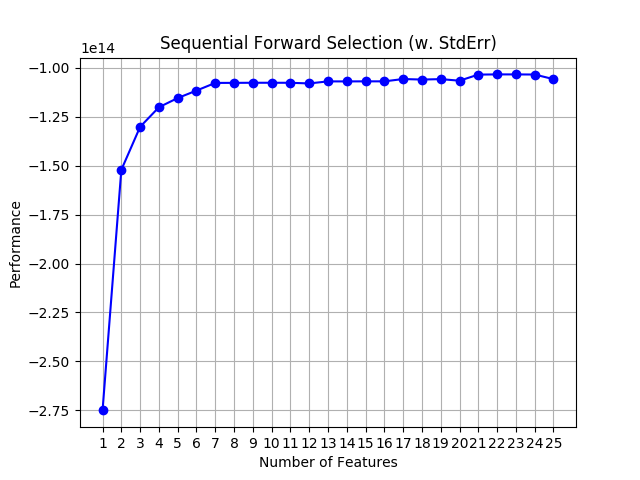

In [119]:
sffs = SFS(model, 
           k_features=25,
           forward=True,
           floating=True,
           scoring='neg_mean_squared_error',
           cv=0)

sffs = sffs.fit(X.values, y)

print('\nSequential Floating Forward Selection (k=25):')
print(sffs.k_feature_idx_)
print('CV Score:')
print(sffs.k_score_)
fig = plot_sfs(sffs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()


Sequential Floating Backward Selection (k=25):
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24)
CV Score:
0


<IPython.core.display.Javascript object>


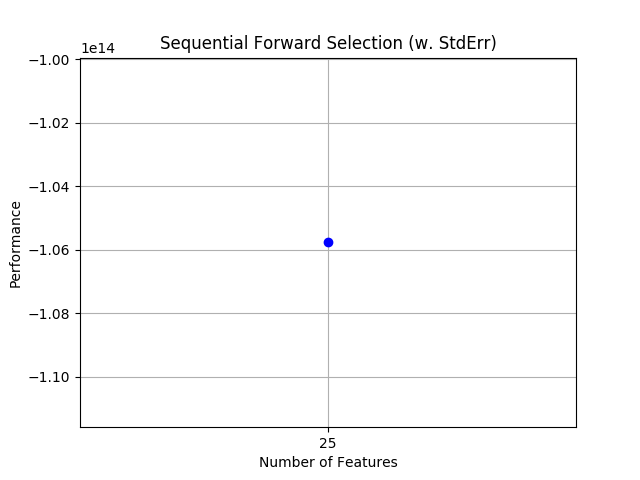

In [120]:
sfbs = SFS(model, 
           k_features=25,
           forward=False,
           floating=True,
           scoring='neg_mean_squared_error',
           cv=0)

sfbs = sfbs.fit(X.values, y)

print('\nSequential Floating Backward Selection (k=25):')
print(sfbs.k_feature_idx_)
print('CV Score:')
print(sfbs.k_score_)
fig = plot_sfs(sfbs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()